In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
df_UK.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,118125.00,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,38260.50,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
9778,Senior Data Analyst,Workday HCM Senior Data Analyst (18 month FTC),"London, UK",via Ai-Jobs.net,Contractor,False,United Kingdom,2023-07-10 13:36:15,True,False,United Kingdom,year,83381.25,NaN,WPP,"[vba, python, r, oracle, sap, excel]","{'analyst_tools': ['sap', 'excel'], 'cloud': [..."
9903,Senior Data Engineer,Senior Satellite Analytics Data Engineer,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-10 13:34:53,False,False,United Kingdom,year,110625.00,NaN,Verisk,"[python, sql, nosql, mongodb, mongodb, elastic...","{'cloud': ['aws'], 'databases': ['mongodb', 'e..."
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,82125.00,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
15507,Senior Data Scientist,Senior Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-03-06 14:03:44,False,False,United Kingdom,year,66096.00,NaN,6point6,"[python, tensorflow, pytorch, numpy]","{'libraries': ['tensorflow', 'pytorch', 'numpy..."
16526,Data Analyst,Portfolio Data Feeds - Associate Portfolio Dat...,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-24 13:11:25,False,False,United Kingdom,year,75375.00,NaN,Addepar,"[sql, jupyter]","{'libraries': ['jupyter'], 'programming': ['sq..."
19237,Senior Data Engineer,Senior Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-31 14:00:46,True,False,United Kingdom,year,110625.00,NaN,OpenCredo,"[java, python, aws, kafka, spark, airflow, flow]","{'cloud': ['aws'], 'libraries': ['kafka', 'spa..."
20017,Data Scientist,Content Manager with ML/Data Science Experience,Anywhere,via AngelList,Contractor,True,United Kingdom,2023-02-27 13:14:54,False,False,United Kingdom,year,45000.00,NaN,Neurons Lab,[aws],{'cloud': ['aws']}
20817,Data Engineer,Data Engineer,"Cambridge, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-28 13:20:22,False,False,United Kingdom,year,110625.00,NaN,"Flagship Pioneering, Inc.","[ruby, ruby, python, r, aws, gitlab]","{'cloud': ['aws'], 'other': ['gitlab'], 'progr..."


In [ ]:
# filter for the job titles and country
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

Convert Currency to GBP

In [ ]:
import numpy as np
conversion_rate = 0.75

# Update salary_year_avg and salary_hour_avg columns
df_UK['salary_year_avg'] = df_UK['salary_year_avg'].apply(lambda x: x * conversion_rate if not np.isnan(x) else x)
df_UK['salary_hour_avg'] = df_UK['salary_hour_avg'].apply(lambda x: x * conversion_rate if not np.isnan(x) else x)

Finding most common job_titles

In [ ]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_Uk_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_Uk_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

Box plot of salary distribution

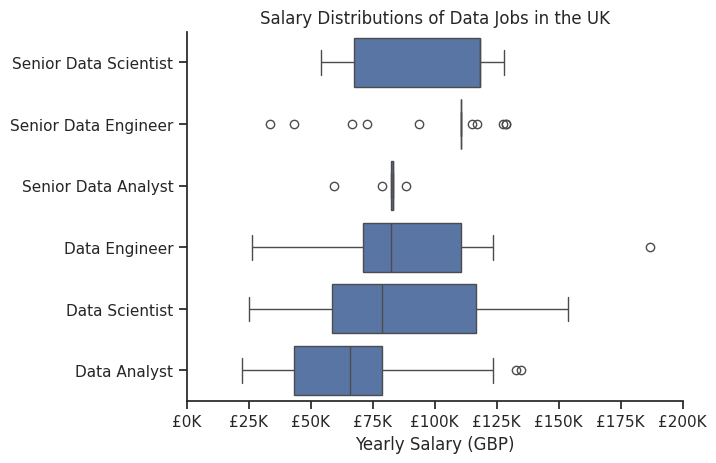

In [ ]:
sns.boxplot(data=df_Uk_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the UK')
plt.xlabel('Yearly Salary (GBP)')
plt.ylabel('')
plt.xlim(0, 200000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Filter for just Data Scientists

In [ ]:
# Only get data Scientist jobs in the UK
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

df_DS_UK = df_DS_UK.explode('job_skills')

df_DS_UK[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


Find highest median pay for skill

In [ ]:
df_DS_top_pay = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DS_top_pay = df_DS_top_pay.head(10)

df_DS_top_pay

,count,median
job_skills,,
scala,1,205000.0
word,1,165000.0
redshift,2,162500.0
pyspark,1,160000.0
keras,3,160000.0
java,1,157500.0
power bi,8,145030.0
github,3,139216.0
windows,1,139216.0


Highest median salary based on skill popularity(filtering out skills that appear less than 10 times)

In [ ]:
df_DS_skills = df_DS_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.head(10).sort_values(by='median', ascending=False)

df_DS_skills = df_DS_skills[df_DS_skills['count']>10]

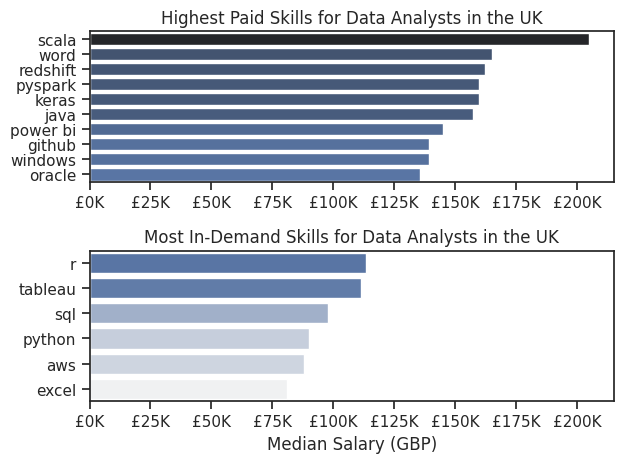

In [ ]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DS_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Highest Paid Skills for Data Analysts in the UK')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DS_skills, x='median', y=df_DS_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DS_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the UK')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (GBP)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()